# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**:

-what areas have the most customers that use the service ?and what areas have the least customers and why is that the case for both ? 

-what areas have traffic congestion where a bike can save you time in an evident way ?

-how much of the customers use the system for fittness and how much use it for easier transporatation ?what is the average age of the users ?

-what make a short term customer not use the service again ?analyzing the data of short term customers and examine if there is a pattern we can detect .

-which days of the week the system is used the most ? 

-as a customer i need to have a clear route for every station and maybe suggested routes for the bike for different parts of the city , that can be answered by the cities data and routemaps.

-as a customer i need to have a clear idea about the rules and a good customer service should be available, the satisfaction of the customers about the service much be measured or survyed .



> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [1]:
## import all necessary packages and functions.
from collections import namedtuple
import csv # read and write csv files
from datetime import datetime,date # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        
        ## TODO: Use the csv library to set up a DictReader object. ##
         trip_reader = csv.DictReader(f_in)
        ## see https://docs.python.org/3/library/csv.html           ##
       
         first_trip = trip_reader.__next__()   
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
         pprint(first_trip)
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip



City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    if city == 'Washington':
        duration = (( (float(datum['Duration (ms)']))/(1000*60) )%60 )
    else :
        duration = (((float(datum['tripduration']) )/60)%60 )
    
    return duration

# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001


In [4]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
 #start date in washington --> ('Start date', '3/31/2016 22:57') , in NYC--> 'starttime', '1/1/2016 00:09:55'
 #chicago--> 'starttime', '3/31/2016 23:30'
    
    if city== 'Washington':
        date_string = datum['Start date']
        parsed_date_default_format=datetime.strptime(date_string, '%m/%d/%Y %H:%M' )
        new_format_string= parsed_date_default_format.strftime('%m %H %A')
        month,hour,day_of_week=new_format_string.split(' ')
    
    elif city == 'Chicago':
        date_string = datum['starttime']
        parsed_date_default_format=datetime.strptime(date_string, '%m/%d/%Y %H:%M' )
        new_format_string= parsed_date_default_format.strftime('%m %H %A')
        month,hour,day_of_week=new_format_string.split(' ')
        
    elif city=='NYC':
        date_string = datum['starttime']
        parsed_date_default_format=datetime.strptime(date_string, '%m/%d/%Y %H:%M:%S' )
        new_format_string= parsed_date_default_format.strftime('%m %H %A')
        month,hour,day_of_week=new_format_string.split(' ')
    
    return (int(month), int(hour), day_of_week)

pprint(time_of_trip(example_trips[city], city))
month,hour,day_of_week=time_of_trip(example_trips[city], city)
# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}


for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]


(3, 22, 'Thursday')


In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    """
    'Washington'--> ('Member Type', 'Registered'/'casual' ) , 'NYC'-->('usertype', 'Customer'/'Subscriber') ,

    'Chicago'--> ('usertype', 'Subscriber'/ 'Customer')
    """
    if city== 'Washington':
        if datum['Member Type']=='Registered':
            user_type='Subscriber'
        else:
            user_type='Customer'
    else:
        user_type=datum['usertype']
    
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]
    


**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [6]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
 #  duration_in_mins(datum, city)  ,type_of_user(datum, city),time_of_trip(datum, city)
            new_point = {}

            
            new_point['duration']=duration_in_mins(row, city)
            month,hour,day_of_week=time_of_trip(row, city)
            new_point['month']=month
            new_point['hour']=hour
            new_point['day_of_week']=day_of_week
            new_point['user_type']=type_of_user(row, city)
            trip_writer.writerow( new_point)
            
            
            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            
            

In [7]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: 'NYC' has the highest number of trips , 'NYC'  has the highest proportion of trips made by subscribers ,  'Chicago' has the highest proportion of trips made by short-term customers

In [8]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

In [9]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

total_trips={}
number_of_subscribers_trips={}
trips_subscribers_proption={}
trips_customers_proption={}
number_of_customers_trips={}


data_files = ['./data/NYC-2016-Summary.csv',
              './data/Chicago-2016-Summary.csv',
              './data/Washington-2016-Summary.csv']

for data_file in data_files:
        city_name=data_file.split('-')[0].split('/')[-1]
    
        trips_subscribers_proption[city_name]= (number_of_trips(data_file)[0])/number_of_trips(data_file)[2]
        number_of_subscribers_trips[city_name]= (number_of_trips(data_file)[0])
        trips_customers_proption[city_name]=(number_of_trips(data_file)[1])/number_of_trips(data_file)[2]
        number_of_customers_trips[city_name]=(number_of_trips(data_file)[1])
        total_trips[city_name]=number_of_trips(data_file)[2]
  
pprint('trips subscribers proption {}'.format( (max(zip(trips_subscribers_proption.values() ,trips_subscribers_proption.keys() )) ) ) )
pprint('trips customers proption {} '.format (( max(zip(trips_customers_proption.values() ,trips_customers_proption.keys() ) ) ) ))
pprint('Max number of total trips {}'.format (max(zip(total_trips.values() ,total_trips.keys() ) ) ) )


pprint("trip subscriber proption are : {}" .format(trips_subscribers_proption) )
pprint("trip customers proption are {}".format(trips_customers_proption) )
pprint("total trips are {}" .format(total_trips) )
pprint('number of subscribers trips {}'.format( number_of_subscribers_trips))
pprint('number of customers trips {}'.format(number_of_customers_trips))




"trips subscribers proption (0.8883590199351151, 'NYC')"
"trips customers proption (0.23774798630269925, 'Chicago') "
"Max number of total trips (276798, 'NYC')"
("trip subscriber proption are : {'NYC': 0.8883590199351151, 'Chicago': "
 "0.7622520136973008, 'Washington': 0.7802822422579381}")
("trip customers proption are {'NYC': 0.11164098006488486, 'Chicago': "
 "0.23774798630269925, 'Washington': 0.21971775774206193}")
"total trips are {'NYC': 276798, 'Chicago': 72131, 'Washington': 66326}"
("number of subscribers trips {'NYC': 245896, 'Chicago': 54982, 'Washington': "
 '51753}')
("number of customers trips {'NYC': 30902, 'Chicago': 17149, 'Washington': "
 '14573}')


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: 
            
            average of trip length in NYC is 13.241114880406245
            proption of rides longer than 30 minutes in NYC is 6.63769246887622 %
            
            average of  trip length in Chicago is 14.145528968127447
            proption of rides longer than 30 minutes in Chicago is 6.899945931707588 %
            
            average of  trip length in Washington is 14.219789700620257'
            proption of rides longer than 30 minutes in Washington is 7.981786931218526 %'

In [10]:
## Use this and additional cells to answer Question 4b.                 ##
##  with open(filename, 'r') as f_in:
        # set up csv reader object
     #   reader = csv.DictReader(f_in)

data_files = ['./data/NYC-2016-Summary.csv',
              './data/Chicago-2016-Summary.csv',
              './data/Washington-2016-Summary.csv']       


def durations_per_city(filename) :    
    with open(filename,'r') as file_in :
        reader=csv.DictReader(file_in)
        durations_of_each_city=[] 
        for row in reader:
            durations_of_each_city.append(float(row['duration']))
            
    
    return durations_of_each_city



for city_file in data_files:
    name_city=city_file.split('-')[0].split('/')[-1]
    proption= (sum (i>30  for i in durations_per_city(city_file)) )/total_trips[name_city]
    average=( sum(durations_per_city(city_file) ) )/float(len(durations_per_city(city_file)))
    
    pprint("average of durations in {} is {}".format(name_city,average ))
       
    pprint("proption of rides longer than 30 minutes in {} is {} %".format( name_city, proption*100 ))
    
       
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##



'average of durations in NYC is 13.241114880406245'
'proption of rides longer than 30 minutes in NYC is 6.63769246887622 %'
'average of durations in Chicago is 14.145528968127447'
'proption of rides longer than 30 minutes in Chicago is 6.899945931707588 %'
'average of durations in Washington is 14.219789700620257'
'proption of rides longer than 30 minutes in Washington is 7.981786931218526 %'


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: 

             i chose 'NYC' as a the city under test :
             customers ride duration in "NYC" on average is 21.475711928030513
             subscriber ride duration in "NYC" on average is 12.206264708115235
             customers on average take longer rides
             
              

In [11]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##

def customer_subscriber_duration (filename):
    
     """
     This function reads in a file with trip data and returns a tuple of :
     (customer_duration, subscriber_duration )

     """
     with open(filename,'r') as data_file :
        reader=csv.DictReader(data_file)
        customer_duration=[]
        subscriber_duration=[]
    
        for row in reader :
            if row['user_type']=='Subscriber':
                subscriber_duration.append(float(row['duration']))
            else:
                customer_duration.append(float(row['duration']))
     return (customer_duration,subscriber_duration)

NYC_customer_duration=customer_subscriber_duration('./data/NYC-2016-Summary.csv')[0] 
NYC_subscriber_duration=customer_subscriber_duration('./data/NYC-2016-Summary.csv')[1]

pprint('customers ride duration in "NYC" on average is {}'.format (sum(NYC_customer_duration)/float(len(NYC_customer_duration) )) )
pprint('subscriber ride duration in "NYC" on average is {}'.format (sum(NYC_subscriber_duration)/float(len(NYC_subscriber_duration) )) )
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##




'customers ride duration in "NYC" on average is 21.475711928030513'
'subscriber ride duration in "NYC" on average is 12.206264708115235'


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

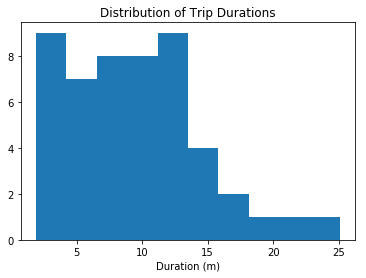

In [12]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

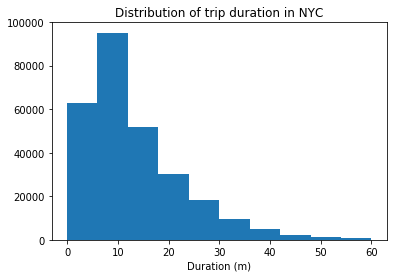

In [13]:
## Use this and additional cells to collect all of the trip times as a list ##
data =durations_per_city('./data/NYC-2016-Summary.csv')
plt.hist(data)
plt.title('Distribution of trip duration in NYC')
plt.xlabel('Duration (m)')
plt.show()

## and then use pyplot functions to generate a histogram of trip times.     ##



If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**:
             
  peak of the the subscriber distribution is 84460.0 which corresponds to duration 5
  peak of the the customer distribution is 5576.0 which corresponds to duration 20
             
the subscribers distribution is negatively skewed where most of the subscribers don't spend much time on their biking trip where 84460 times the subscriber had trips of 5 minutes , where very few customers had trips of 40 minutes
            
the customers distribution tend to be more like a noraml distribution , where customers tend not to have very long or very short trips , the most common trip durations ranges approximately from 5-10 up to 35-40 minutes , where 5576 the customers had trips of 20 minutes

we note that the number of subscribers trips in NYC is (245896) which is more than customers trips (30902) so to judge the distributions more accurately we need to scale both to the same scale
             

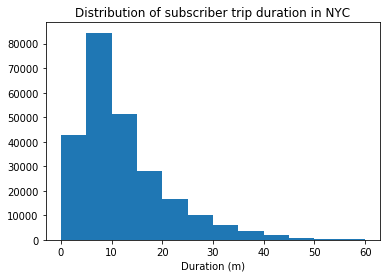

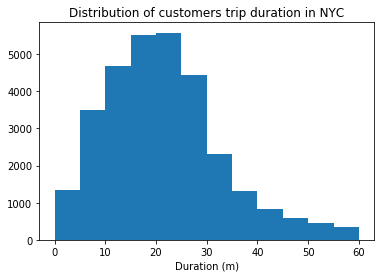

('peak of the the subscriber distribution is 84460.0 which corresponds to '
 'duration 5')
('peak of the the customer distribution is 5576.0 which corresponds to '
 'duration 20')


In [14]:
## Use this and additional cells to answer Question 5. ##

data_files = ['./data/NYC-2016-Summary.csv',
              './data/Chicago-2016-Summary.csv',
              './data/Washington-2016-Summary.csv']  
Chicago_customer_duration , Chicago_subscriber_duration =customer_subscriber_duration('./data/Chicago-2016-Summary.csv')
Washington_customer_duration , Washington_subscriber_duration =customer_subscriber_duration('./data/Washington-2016-Summary.csv')


binwidth=5

bins_cal_subscriber=range( int(min(NYC_subscriber_duration)) , (int(max(NYC_subscriber_duration))+binwidth ) ,binwidth)
range_cal_subscriber=(int(min(NYC_subscriber_duration )),75 )

y_sub, x_sub, _= plt.hist(NYC_subscriber_duration ,range=range_cal_subscriber ,bins= bins_cal_subscriber)
plt.title('Distribution of subscriber trip duration in NYC')
plt.xlabel('Duration (m)')
plt.show()

bin_cal_customer=range( int(min(NYC_customer_duration)) , (int(max(NYC_customer_duration))+binwidth ) ,binwidth)
range_cal_customer=(int(min(NYC_customer_duration )),75 )

y_cust, x_cust, _ = plt.hist(NYC_customer_duration, range=range_cal_customer, bins=bin_cal_customer )
plt.title('Distribution of customers trip duration in NYC')
plt.xlabel('Duration (m)')
plt.show()


def peak_of_distr (y_axis_parameters,x_axis_parameters):
    y_max=max(y_axis_parameters)
    for index in range(len(y_axis_parameters)):
        if y_axis_parameters[index] == y_max:
            x_max=x_axis_parameters[index]
    return (y_max  ,x_max)

pprint('peak of the the subscriber distribution is {} which corresponds to duration {}'.format(peak_of_distr(y_sub, x_sub)[0] ,peak_of_distr(y_sub, x_sub)[1]) )
                
pprint('peak of the the customer distribution is {} which corresponds to duration {}'.format(peak_of_distr(y_cust, x_cust)[0] ,peak_of_distr(y_cust, x_cust)[1]) )




<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**:  How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of     Subscriber trips to Customer trips change depending on the month or season?

season_month_effect(max_ride_duration_per_month=(9, 32698), max_ride_duration_per_season=('autmun', 88363), rides_per_month={1: 10180, 2: 11169, 3: 18412, 4: 20159, 5: 24454, 6: 29241, 7: 27521, 8: 31103, 9: 32698, 10: 31518, 11: 24147, 12: 16185}, rides_per_season={'spring': 63025, 'summer': 87865, 'autmun': 88363, 'winter': 37534}, monthly_customers_ride={1: 488, 2: 569, 3: 1878, 4: 2632, 5: 3209, 6: 3136, 7: 3977, 8: 4412, 9: 4393, 10: 3380, 11: 2039, 12: 789}, monthly_subscribers_ride={1: 9693, 2: 10601, 3: 16535, 4: 17528, 5: 21246, 6: 26106, 7: 23545, 8: 26692, 9: 28306, 10: 28139, 11: 22109, 12: 15396}, subscribers_ride_by_season={'spring': 55309, 'summer': 76343, 'autmun': 78554, 'winter': 35690}, customers_ride_by_season={'spring': 7719, 'summer': 11525, 'autmun': 9812, 'winter': 1846})
{1: 19.862704918032787,
 2: 18.63093145869947,
 3: 8.80457933972311,
 4: 6.659574468085107,
 5: 6.620754129012154,
 6: 8.324617346938776,
 7: 5.920291677143576,
 8: 6.049864007252946,
 9: 6.443

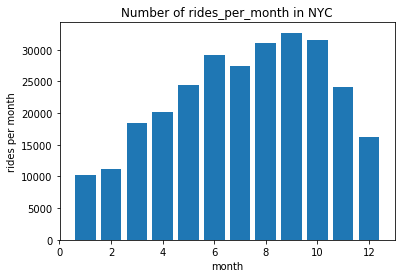

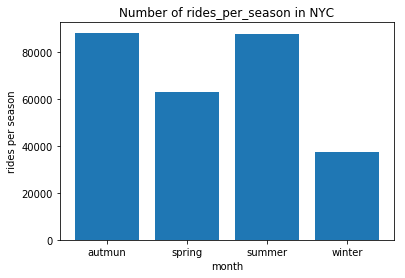

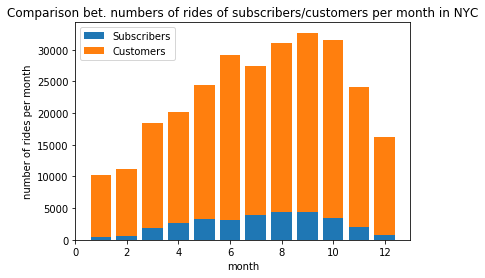

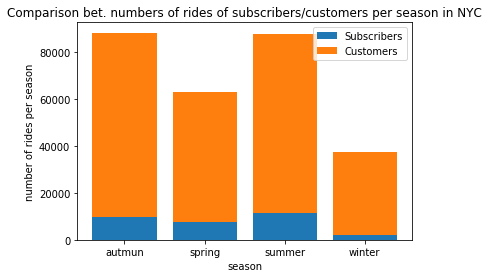

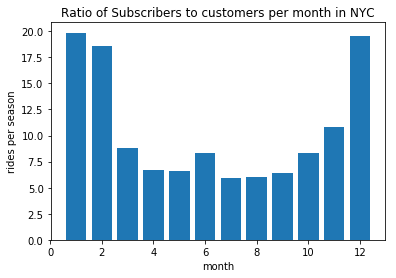

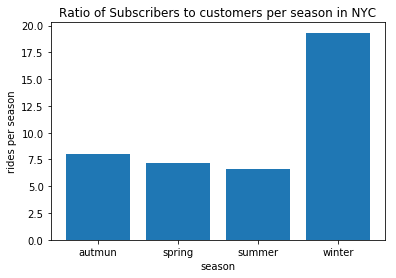

In [15]:
## Use this and additional cells to continue to explore the dataset. ##
def season_month_effect (datafile):
    
    """this function reads in a file with trip data and returns a tuple of
    
     (max_ride_duration_per_month : list containing the month and number of rides corresponding to  highest riding month [month, max number of ridings] ,
      max_ride_duration_per_season :list containing the season and number of rides corresponding to highest riding season [season,max number of ridings],
      rides_per_month :a Dict containing number of trips per each month ,
      rides_per_season :a Dict containing the subscriber to customer ratio for every month,
      monthly_customers_ride : a Dict containing customers rides per month,
      monthly_subscribers_ride : a Dict containing subscribers rides per month,
      subscribers_ride_by_season : a Dict containing subscribers ride by season,
      customers_ride_by_season :  a Dict containing customers rides per season )
     
     
     
    """
    with open(datafile,'r') as file_in :
       
        reader=csv.DictReader(file_in)
#initializing the dictionaries and lists to contain the data
        seasons_riding_dict={'spring':0 , 'summer':0,'autmun':0,'winter':0}
        month_riding_dict={}
        monthly_customers_ride={}
        monthly_subscriber_ride={}
        subscriber_ride_by_season={'spring':0 , 'summer':0,'autmun':0,'winter':0}
        customer_ride_by_season={'spring':0 , 'summer':0,'autmun':0,'winter':0}
        max_month_ride=[0,0]
        max_season_ride=[0,0]
            
#iterating over the data in the file row by row and assiging each data in a row to it's coressponding month
#creating 3 dictionaries : a Dict that encloses the number of rides for each month , 2 Dicts that encloses the number of rides per month 
#for customers and subscribers

        for index in range(1,13):
            
                 monthly_customers_ride[index]=0
                 monthly_subscriber_ride[index]=0
                 month_riding_dict[index]=0
                
                 for row in reader:
                    
                    if row['user_type'] == 'Subscriber':
                              monthly_subscriber_ride[index]+=1
                    else:
                              monthly_customers_ride[index]+=1
                                
                    if int(row['month'])== index :
                        
                              month_riding_dict[index]+=1
                    else :
                              break
        
#iterating over the (per month) dictionaries created above to create  3 dicts enclosing number of rides per season , and number of 
#rides per season for customers and subscribers
#also get the maximum number of rides per month and save the number and the corresponding month in a list
    
        for month in  month_riding_dict :
                    
                    if month_riding_dict[month] > max_month_ride[1]:
                        
                        max_month_ride=month,month_riding_dict[month]
                        
            
                    if (month == 3) or (month== 4) or (month==5) :
                    
                        seasons_riding_dict['spring']+=month_riding_dict[month]
                        
                        subscriber_ride_by_season['spring']+=monthly_subscriber_ride[month]
                        
                        customer_ride_by_season['spring']+=monthly_customers_ride[month]
                        
                        
                        
                        
                    elif month == 6 or month== 7 or month==8:
                        
                        seasons_riding_dict['summer']+=month_riding_dict[month]
                        
                        subscriber_ride_by_season['summer']+=monthly_subscriber_ride[month]
                        
                        customer_ride_by_season['summer']+=monthly_customers_ride[month]
                         
                    elif month ==   9 or month== 10 or month== 11:
                        
                        seasons_riding_dict['autmun']+=month_riding_dict[month]
                        
                        subscriber_ride_by_season['autmun']+=monthly_subscriber_ride[month]
                        
                        customer_ride_by_season['autmun']+=monthly_customers_ride[month]
                        
                    else:
                        seasons_riding_dict['winter']+=month_riding_dict[month]
                        
                        subscriber_ride_by_season['winter']+=monthly_subscriber_ride[month]
                        
                        customer_ride_by_season['winter']+=monthly_customers_ride[month]
                        
#get the maximum number of rides per season and save the number and the corresponding season in a list
                        
        for season in seasons_riding_dict:
        
                    if seasons_riding_dict[season] > max_season_ride[1]:
                        max_season_ride= season, seasons_riding_dict[season]
                    
#return the values in a namedtuple to be easier in addressing                    

        return_values=namedtuple("season_month_effect", ["max_ride_duration_per_month", "max_ride_duration_per_season", "rides_per_month","rides_per_season" ,"monthly_customers_ride","monthly_subscribers_ride","subscribers_ride_by_season",
        "customers_ride_by_season"])             

                
    return return_values(max_month_ride,max_season_ride, month_riding_dict,seasons_riding_dict,monthly_customers_ride,monthly_subscriber_ride,subscriber_ride_by_season,
        customer_ride_by_season)
                          
                
                     
#create an instance from the return value                
findings=season_month_effect('./data/NYC-2016-Summary.csv')
pprint(findings)

#initializing dicts to carry the ratio of subscriber to customers per month and per season
ratio_of_Subs_cust_per_month={}
ratio_of_Subs_cust_per_season={}

#iterate over the subscribers rides per month and customers ride per month to divide them and get the ratio between them per each month
for month in findings.monthly_subscribers_ride :
    
       ratio_of_Subs_cust_per_month[month]=((findings.monthly_subscribers_ride[month])/ findings.monthly_customers_ride[month])
pprint(ratio_of_Subs_cust_per_month)
#iterate over the subscribers rides per season and customers ride per season to divide them and get the ratio between them per each season
for season in findings.customers_ride_by_season:
       ratio_of_Subs_cust_per_season[season]=(findings.subscribers_ride_by_season[season])/findings.customers_ride_by_season[season]
    
pprint(ratio_of_Subs_cust_per_season)


#visiualization of the data : 

#extracting the data we are going t visualize from the returned values instance

rides_per_month=findings.rides_per_month

rides_per_season=findings.rides_per_season

monthly_customers_rides=findings.monthly_customers_ride

monthly_subscribers_rides=findings.monthly_subscribers_ride

customers_ride_by_season=findings.customers_ride_by_season

subscribers_ride_by_season=findings.subscribers_ride_by_season


#using the .bar()plot method to plot rides per month

plt.bar(rides_per_month.keys() , rides_per_month.values())
plt.title('Number of rides_per_month in NYC')
plt.xlabel('month')
plt.ylabel("rides per month")
plt.show()

#using the .bar()plot method to plot rides per season
plt.bar(rides_per_season.keys() , rides_per_season.values())
plt.title('Number of rides_per_season in NYC')
plt.xlabel('month')
plt.ylabel("rides per season")
plt.show()

#using the .bar()plot method to plot rides per month for subscriber accompined with those of the customers

p1=plt.bar(monthly_customers_rides.keys(),monthly_customers_rides.values())
p2=plt.bar(monthly_subscribers_rides.keys(),monthly_subscribers_rides.values(), bottom=list(monthly_customers_rides.values()) )
plt.xlabel('month')
plt.ylabel("number of rides per month")
plt.title("Comparison bet. numbers of rides of subscribers/customers per month in NYC")
plt.legend((p1[0],p2[0]), ('Subscribers','Customers'))

plt.show()


#using the .bar()plot method to plot rides per season for subscriber accompined with those of the customers
p1=plt.bar(customers_ride_by_season.keys(),customers_ride_by_season.values())
p2=plt.bar(subscribers_ride_by_season.keys(),subscribers_ride_by_season.values(), bottom=list(customers_ride_by_season.values()) )
plt.ylabel("number of rides per season")
plt.title("Comparison bet. numbers of rides of subscribers/customers per season in NYC")
plt.xlabel("season")
plt.legend((p1[0],p2[0]), ('Subscribers','Customers'))

plt.show()

#using the .bar()plot method to plot Ratio of Subscribers to customers per month in NYC
plt.bar(ratio_of_Subs_cust_per_month.keys() , ratio_of_Subs_cust_per_month.values())
plt.ylabel("rides per season")
plt.title('Ratio of Subscribers to customers per month in NYC')
plt.xlabel('month')
plt.show()

#using the .bar()plot method to plot Ratio of Subscribers to customers per season in NYC
plt.bar(ratio_of_Subs_cust_per_season.keys() , ratio_of_Subs_cust_per_season.values())
plt.title('Ratio of Subscribers to customers per season in NYC')
plt.xlabel('season')
plt.ylabel("rides per season")
plt.show()

## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                       ##

from the above exploration in' NYC' related datafile ,deductions are:


1- in NYC , number of rides increases in months between March and November and decreases at colder months (12,1,2) so weather effects the number of rides

2-number of rides differ each month where differences are in terms of --ten thousands-- which a high value where some months record much lower than others the maximum difference between recorded values was 22518
the month with maximum number of rides was **september** were **32698** rides were recoreded
the month with minimum number of rides was **january** were  **10180**

2-number of rides differ by season where **autumn** was the season with maximum rides **88363** , where **winter** was the season with lowest number of rides  **37534**

3-Subscribers and customers rides per month and per season have the same pattern of the total rides per month ,where ratios between customers and subscribers differ per month

3-as stated above ratio of subscribers to customers differ by month ,where in **january** and  **December** subscribers ratio tend to increase up to **19.86, 19.51** respectively where **july** and **August** witnessed the lowest subscribers to customers ratio **5.92, 6.04**

4-ratio of subscribers to customers differ by season too , where in **winter** subscribers ratio is higher than that of the customers **19.3** while the lowest ratio recorded in summer **6.62**

5-the above results concerning statistics per month shows that customers behaviour affects patterns found in the total rides for each month , as their ratios in the months of rides of the highest value (September) is higher compared to their ratios on other months , also in months of lowest number of rides (january) the higher ratio of subscriber wasn't enough to increase the overall
number of rides in that month

6-results concerning season statistics gives us the same deduction , that Subscribers don't effect the overall patterns of number of rides per season , as in winter although the ratio of Subscriber were the greatest compared to it's rato in other seasons , it was recoreded as the season with the lowest trips

that can be attributed to the fact that number of customers is more than the number of Subscribers 





<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: applying datascience into educational field , knowing how different techniques affect student engagement and understanding 

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

In [17]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0